In [1]:
## Per_Capita_Final
#dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read in CSVs
file_one = pd.read_csv("per_capita_income_final.csv")
file_two = pd.read_csv("employment_compensation_final.csv")
file_three = pd.read_csv("total_employment_final.csv")

In [3]:
#population and per capita income per metro area
percapita_income_df = pd.DataFrame(file_one)
percapita_income_df = percapita_income_df[~percapita_income_df['Description'].isin(['Personal income (thousands of dollars)'])]
percapita_income_df

,GeoName,Description,2012,2013,2014,2015,2016
1,"Houston-The Woodlands-Sugar Land, TX (Metropol...",Population (persons) 1/,6180817,6324167,6488046,6647465,6772470
2,"Houston-The Woodlands-Sugar Land, TX (Metropol...",Per capita personal income (dollars) 2/,51676,50979,53791,53859,51913
4,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",Population (persons) 1/,19864434,19968845,20052234,20118063,20153634
5,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",Per capita personal income (dollars) 2/,59296,59947,62086,64679,65846
7,"San Francisco-Oakland-Hayward, CA (Metropolita...",Population (persons) 1/,4458646,4521994,4585623,4642227,4679166
8,"San Francisco-Oakland-Hayward, CA (Metropolita...",Per capita personal income (dollars) 2/,69751,70352,75042,81241,84675
10,"San Jose-Sunnyvale-Santa Clara, CA (Metropolit...",Population (persons) 1/,1895787,1924432,1947922,1968578,1978816
11,"San Jose-Sunnyvale-Santa Clara, CA (Metropolit...",Per capita personal income (dollars) 2/,71846,71428,77227,84150,87643


In [14]:
#ca per capita 
CA_metros_PC = percapita_income_df[percapita_income_df['GeoName'].str.contains(", CA")]
CA_metros_group_description=CA_metros_PC.groupby(["Description"]).mean()
CA_metros_group_description.reset_index(inplace=True)
CA_metros_group_description

,Description,2012,2013,2014,2015,2016
0,Per capita personal income (dollars) 2/,70798.5,70890.0,76134.5,82695.5,86159.0
1,Population (persons) 1/,3177216.5,3223213.0,3266772.5,3305402.5,3328991.0


In [68]:
#ca per capita continued
Per_Capita_final_CA=CA_metros_group_description.iloc[0,:]
Per_Capita_final_df_CA=pd.DataFrame(Per_Capita_final_CA)
Per_Capita_final_df_CA=Per_Capita_final_df_CA.T
del Per_Capita_final_df_CA["Description"]
Per_Capita_final_df_CA["City"]="SF/Bay Area"
Per_Capita_final_df_CA=Per_Capita_final_df_CA.set_index("City")
Per_Capita_final_df_CA

,2012,2013,2014,2015,2016
City,,,,,
SF/Bay Area,70798.5,70890,76134.5,82695.5,86159


In [80]:
#new york per capita data
NY_metros_PC = percapita_income_df[percapita_income_df['GeoName'].str.contains(", NY-NJ-PA")]
NY_metros_group_description=NY_metros_PC.groupby(["Description"]).mean()
NY_metros_group_description.reset_index(inplace=True)
NY_metros_group_description
Per_Capita_final_NY=NY_metros_group_description.iloc[0,:]
Per_Capita_final_df_NY=pd.DataFrame(Per_Capita_final_NY)
Per_Capita_final_df_NY=Per_Capita_final_df_NY.T
del Per_Capita_final_df_NY["Description"]
Per_Capita_final_df_NY["City"]="New York"
Per_Capita_final_df_NY=Per_Capita_final_df_NY.set_index("City")
Per_Capita_final_df_NY


,2012,2013,2014,2015,2016
City,,,,,
New York,59296,59947,62086,64679,65846


In [79]:
#texas per capita data
TX_metros_PC = percapita_income_df[percapita_income_df['GeoName'].str.contains(", TX")]
TX_metros_group_description=TX_metros_PC.groupby(["Description"]).mean()
TX_metros_group_description.reset_index(inplace=True)
TX_metros_group_description
Per_Capita_final_TX=TX_metros_group_description.iloc[0,:]
Per_Capita_final_df_TX=pd.DataFrame(Per_Capita_final_TX)
Per_Capita_final_df_TX=Per_Capita_final_df_TX.T
del Per_Capita_final_df_TX["Description"]
Per_Capita_final_df_TX["City"]="TX"
Per_Capita_final_df_TX=Per_Capita_final_df_TX.set_index("City")
Per_Capita_final_df_TX

,2012,2013,2014,2015,2016
City,,,,,
TX,51676,50979,53791,53859,51913


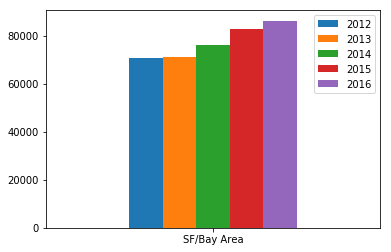

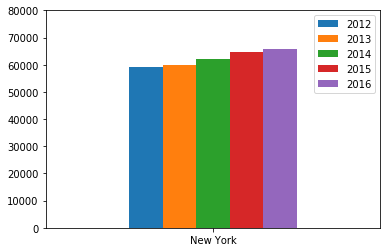

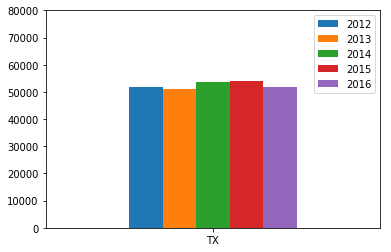

In [83]:
Per_Capita_final_df_CA.plot(kind="bar", label="SF", rot=0)
plt.xlabel("")
Per_Capita_final_df_NY.plot(kind="bar", label="NY", rot=0)
plt.xlabel("")
plt.ylim(0,80000)
Per_Capita_final_df_TX.plot(kind="bar", label="TX", rot=0)
plt.xlabel("")
plt.ylim(0,80000)
plt.show()